# a notebook to figure out some plotting stuff
- for example, a strikezone view of the pitches when they cross the plate
- 3d trails if I can figure that out ( I think there are polynomials in the baseball savant endpoint here: https://baseballsavant.mlb.com/gf?game_pk=) 

In [1]:
from pybaseball import statcast
from pybaseball import playerid_reverse_lookup
from pybaseball import statcast_batter, spraychart

import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# this defaults to yesterday
#end_dt = '2023-03-30'
# remember this will be utc 
end_dt = str(datetime.date.today() + datetime.timedelta(days=-1))


df = statcast(start_dt=end_dt, end_dt=end_dt)

print(df.shape)

This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:47<00:00, 47.16s/it]

(1428, 92)


In [3]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1047,SL,2023-03-31,84.5,3.41,5.29,"Puk, A.J.",643446,640462,field_out,hit_into_play,...,2,1,2,1,2,Strategic,Standard,286,0.035,-0.013
1068,SL,2023-03-31,84.1,3.4,5.38,"Puk, A.J.",643446,640462,NaN,foul,...,2,1,2,1,2,Standard,Standard,280,0.0,-0.031
1139,SL,2023-03-31,83.7,3.39,5.32,"Puk, A.J.",643446,640462,NaN,foul,...,2,1,2,1,2,Standard,Standard,241,0.0,-0.02
1158,FF,2023-03-31,96.3,3.3,5.46,"Puk, A.J.",592192,640462,strikeout,swinging_strike,...,2,1,2,1,2,Standard,Standard,129,0.052,-0.093
1185,SL,2023-03-31,84.0,3.4,5.38,"Puk, A.J.",592192,640462,NaN,swinging_strike,...,2,1,2,1,2,Strategic,Standard,279,0.0,-0.065


In [4]:
a_pitch = df.loc[1]

In [5]:
a_pitch

pitch_type                                CH
game_date                2023-03-31 00:00:00
release_speed                           80.2
release_pos_x                          -1.76
release_pos_z                           6.23
                                ...         
if_fielding_alignment               Standard
of_fielding_alignment               Standard
spin_axis                                246
delta_home_win_exp                       0.0
delta_run_exp                            0.0
Name: 1, Length: 92, dtype: object

In [6]:
a_pitch.game_pk

718766

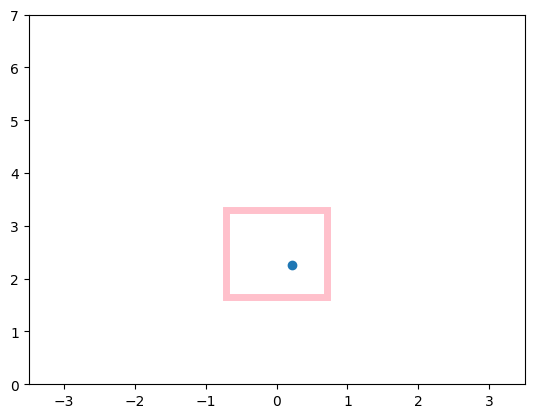

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot(a_pitch["plate_x"], a_pitch["plate_z"], 'o')

#add rectangle to plot
ax.add_patch(Rectangle((-0.71, a_pitch["sz_bot"]), 2*0.71, a_pitch["sz_top"] - a_pitch["sz_bot"],
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
             lw=5))


ax.set_xlim(-3.5, 3.5)
ax.set_ylim(0, 7)

#display plot
plt.show()

In [11]:
# Do this again, but for all pitches

all_pitches = df[df.pitcher == 640462]
# here is the game that he pitched in https://www.youtube.com/watch?v=r5-DFUnWevY

In [12]:
all_pitches

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1047,SL,2023-03-31,84.5,3.41,5.29,"Puk, A.J.",643446,640462,field_out,hit_into_play,...,2,1,2,1,2,Strategic,Standard,286,0.035,-0.013
1068,SL,2023-03-31,84.1,3.4,5.38,"Puk, A.J.",643446,640462,NaN,foul,...,2,1,2,1,2,Standard,Standard,280,0.0,-0.031
1139,SL,2023-03-31,83.7,3.39,5.32,"Puk, A.J.",643446,640462,NaN,foul,...,2,1,2,1,2,Standard,Standard,241,0.0,-0.02
1158,FF,2023-03-31,96.3,3.3,5.46,"Puk, A.J.",592192,640462,strikeout,swinging_strike,...,2,1,2,1,2,Standard,Standard,129,0.052,-0.093
1185,SL,2023-03-31,84.0,3.4,5.38,"Puk, A.J.",592192,640462,NaN,swinging_strike,...,2,1,2,1,2,Strategic,Standard,279,0.0,-0.065
1260,SL,2023-03-31,83.7,3.47,5.36,"Puk, A.J.",592192,640462,NaN,called_strike,...,2,1,2,1,2,Strategic,Standard,276,0.0,-0.038
1289,FF,2023-03-31,95.1,3.31,5.51,"Puk, A.J.",624413,640462,home_run,hit_into_play,...,2,1,2,1,2,Standard,Standard,123,-0.053,1.0
1320,FF,2023-03-31,96.2,3.36,5.5,"Puk, A.J.",596019,640462,strikeout,swinging_strike,...,2,0,2,0,2,Standard,Standard,125,0.037,-0.092
1353,FF,2023-03-31,95.7,3.39,5.47,"Puk, A.J.",596019,640462,NaN,swinging_strike,...,2,0,2,0,2,Standard,Standard,130,0.0,-0.068
1423,SL,2023-03-31,84.8,3.49,5.33,"Puk, A.J.",596019,640462,NaN,called_strike,...,2,0,2,0,2,Standard,Standard,247,0.0,-0.062


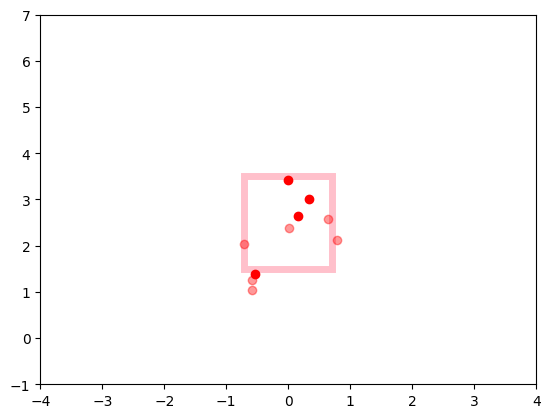

In [13]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

for row in all_pitches.iterrows():
    row = row[1]
    ax.plot(row["plate_x"],
            row["plate_z"],
            'o',
            alpha = 0.4 if pd.isna(row["events"]) else 1,
            color = "green" if row["description"] == "ball" else "red")

#add strike zone to plot
ax.add_patch(Rectangle((-0.71, 1.5), 2*0.71, 2,
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
             lw=5))

ax.set_xlim(-4, 4)
ax.set_ylim(-1, 7)


plt.show()

## Quick things to make this better
- turn into a function
- different colors for different pitch types
- draw a plate?
- markers that show speed and type
- maybe movement with like a empty circle, vector, filled circle


maybe make it infer which kind of plot to make?

In [35]:
def plot_strike_zone(pitch_df: pd.DataFrame, colorby: str = 'pitch_type'):
    # define Matplotlib figure and axis
    fig, ax = plt.subplots()

    # add strike zone to plot
    ax.add_patch(Rectangle((-0.71, 1.5), 2*0.71, 2,
                 edgecolor = 'pink',
                 facecolor = 'blue',
                 fill=False,
                 lw=5))
    
    
    legend_title = ""
    color_label = ""
    
    if colorby == 'pitch_type':
        color_label = 'pitch_type'
        if not legend_title:
            legend_title = 'Pitch Type'

    scatters = []
    
    for color in pitch_df[color_label].unique():
        color_sub_data = pitch_df[pitch_df[color_label] == color]
        scatters.append(ax.scatter(
            color_sub_data["plate_x"], color_sub_data['plate_z'], 20, label=color, alpha=0.5
        ))

    

    ax.set_xlim(-4, 4)
    ax.set_ylim(-1, 7)
    
    plt.axis('off')

    plt.legend(handles=scatters, title="Pitch Type", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()
    
    
    
    

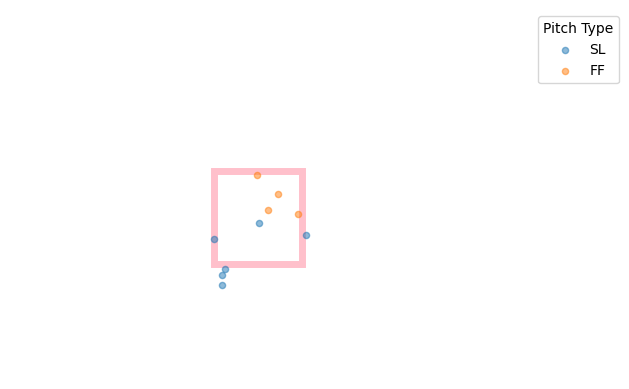

In [36]:
all_pitches = df[df.pitcher == 640462]

plot_strike_zone(all_pitches)